In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import math

from scipy.stats import skew

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc

glucose, bloodpressure, bmi coba ganti mean missing valuenya

coba BloodPressure g usah dihapus karena outliernya hilang

In [2]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def show_the_graphic(df, graphic_type, graphic_title, _col_wrap=5):
  graph = sns.FacetGrid(df.melt(), col="variable", col_wrap=_col_wrap, sharex=False, sharey=False)

  graph.map(graphic_type, "value")

  for i, ax in enumerate(graph.axes.flat):
    ax.set_title(df_diabetes.columns[i])
    data = df.iloc[:, i].dropna()
    mean = data.mean()
    median = data.median()

    ax.axvline(mean, color='orange', linestyle='--', label=f"Mean: {mean:.2f}")
    ax.axvline(median, color='red', linestyle='--', label=f"Mean: {median:.2f}")

  graph.add_legend(title=graphic_title)

  plt.tight_layout()

  plt.show()



# Load Dataset

[Pima Indians Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/code)



*  **Pregnancies**: Number of times pregnant
*  **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   **BloodPressure**: Diastolic blood pressure (mm Hg)
*   **SkinThickness**: Triceps skin fold thickness (mm)
*   **Insulin**: 2-Hour serum insulin (mu U/ml)
*   **BMI**: Body mass index (weight in kg/(height in m)^2)
*   **DiabetesPedigreeFunction**: Diabetes pedigree function
*   **Age**: age (years)
*   **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0












In [5]:
path = '/content/drive/MyDrive/INDONESIA AI/wa2-pima-indians-diabetes.csv'

In [6]:
df_diabetes = pd.read_csv(path, names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [7]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print('Total rows: ', df_diabetes.shape[0])
print('Total columns: ', df_diabetes.shape[1])

Total rows:  768
Total columns:  9


# Check Data Info

In [9]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the information above, it can be seen that there are no columns that have missing values, but this must be confirmed again by calculating the missing values and visualizing them in the graph in the Check Null Values section.

In [10]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the information above, the majority of columns have a value of 0. However, this could be a sign of missing values. If analyzed, only the Pregnancy column is forgiven if there is a value of 0 because it is possible that you have never been pregnant, while other columns may indicate that there are missing values.

# Check Null Values

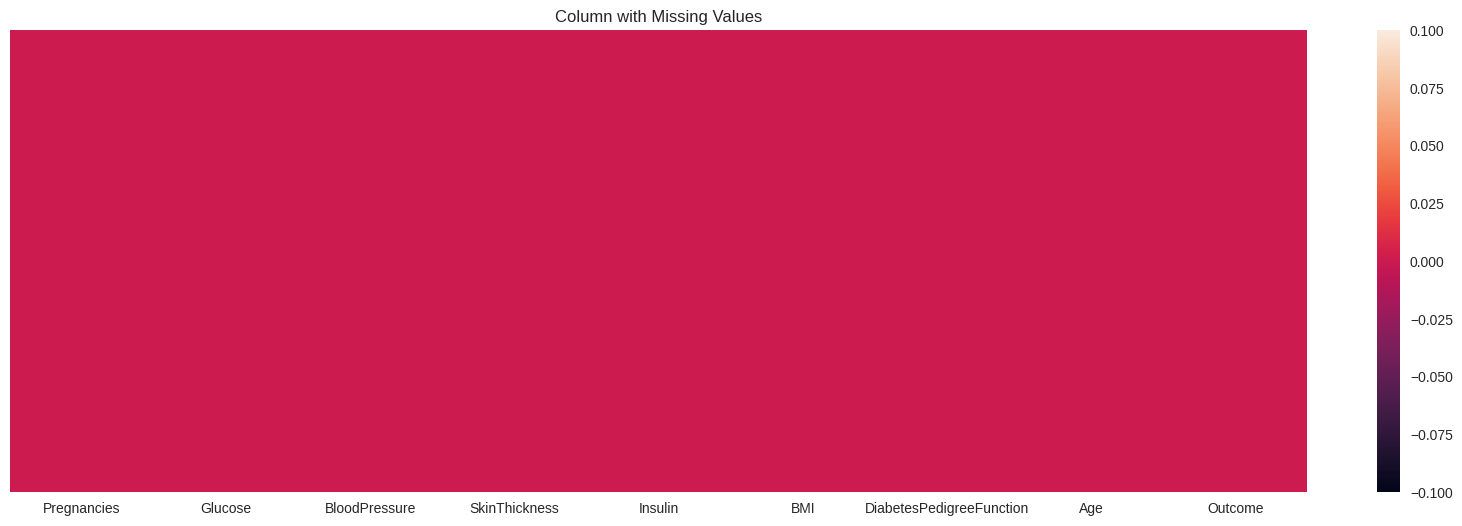

In [11]:
plt.figure(figsize=(18, 6))

sns.heatmap(df_diabetes.isnull(), yticklabels=False, cbar=True, cbar_kws={'fraction': 0.02})

plt.title('Column with Missing Values')

plt.show()

In [12]:
def detect_null_values(data):
    null_column = data.columns[data.isnull().any()]

    head_column = ["Column name", "Total nulls", "Total nulls (%)", "Data type"]

    null_info = pd.DataFrame(columns=head_column)

    for column in null_column:

        total_null = data[column].isnull().sum()

        total_null_percent = (total_null / len(df_diabetes)) * 100

        data_type = data[column].dtype

        null_info = pd.concat([null_info, pd.DataFrame([[column, total_null, total_null_percent, data_type]], columns=head_column)],  ignore_index=True)

    return null_info

null_info = detect_null_values(df_diabetes)

null_info

,Column name,Total nulls,Total nulls (%),Data type


There really are no Nulls

# Check Total Zero Value in Each Column

In [13]:
for column in df_diabetes:
  print(f"{column} : {(df_diabetes[column] == 0).sum()}")

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


# Check Duplicates Value

In [14]:
df_diabetes.duplicated().sum()

0

# Check Correlation with Pearson Coefficient

In [15]:
columns_corr = df_diabetes.corr()['Outcome'].sort_values(ascending=False)

columns_corr

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

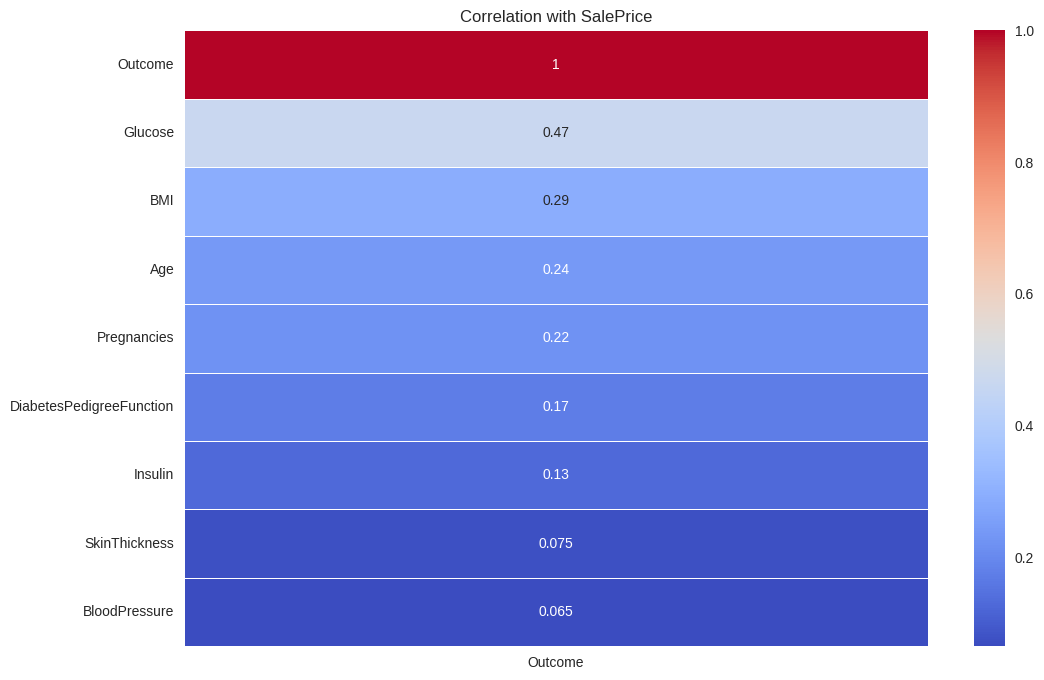

In [16]:
plt.figure(figsize=(12, 8))

sns.heatmap(columns_corr.to_frame(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation with SalePrice')

plt.show()

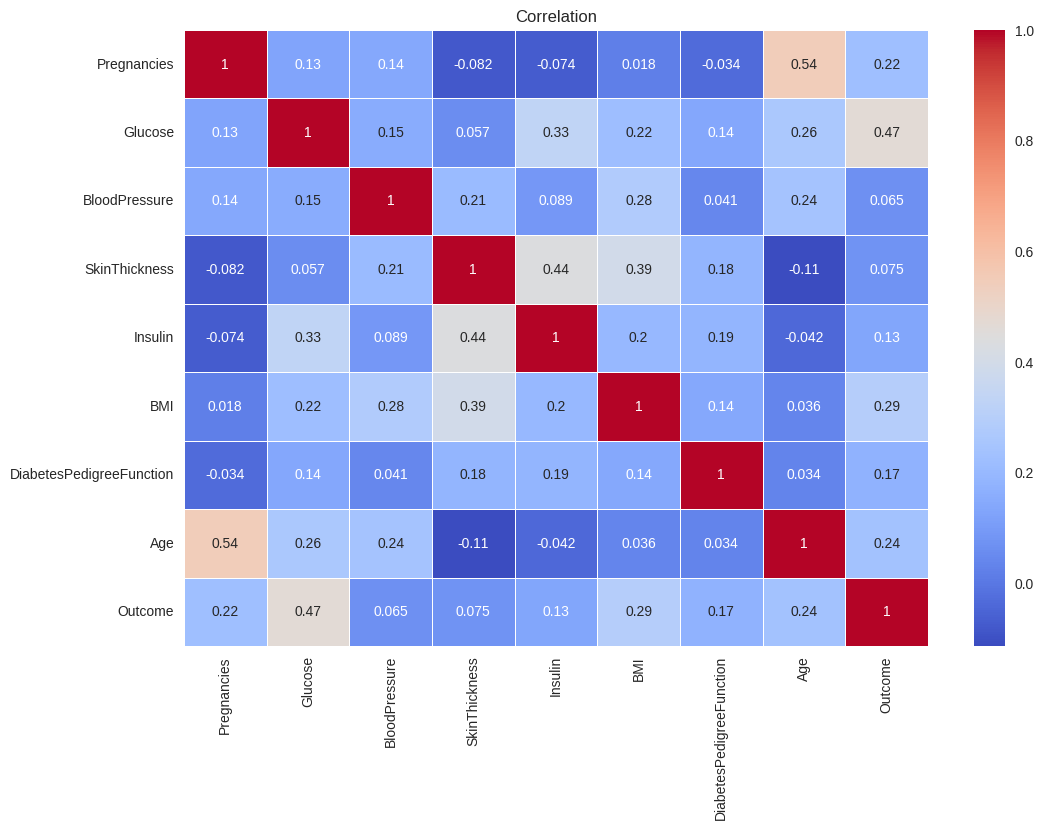

In [17]:
plt.figure(figsize=(12, 8))

sns.heatmap(df_diabetes.corr(), annot=True, cmap='coolwarm', linewidth=.5)

plt.title('Correlation')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


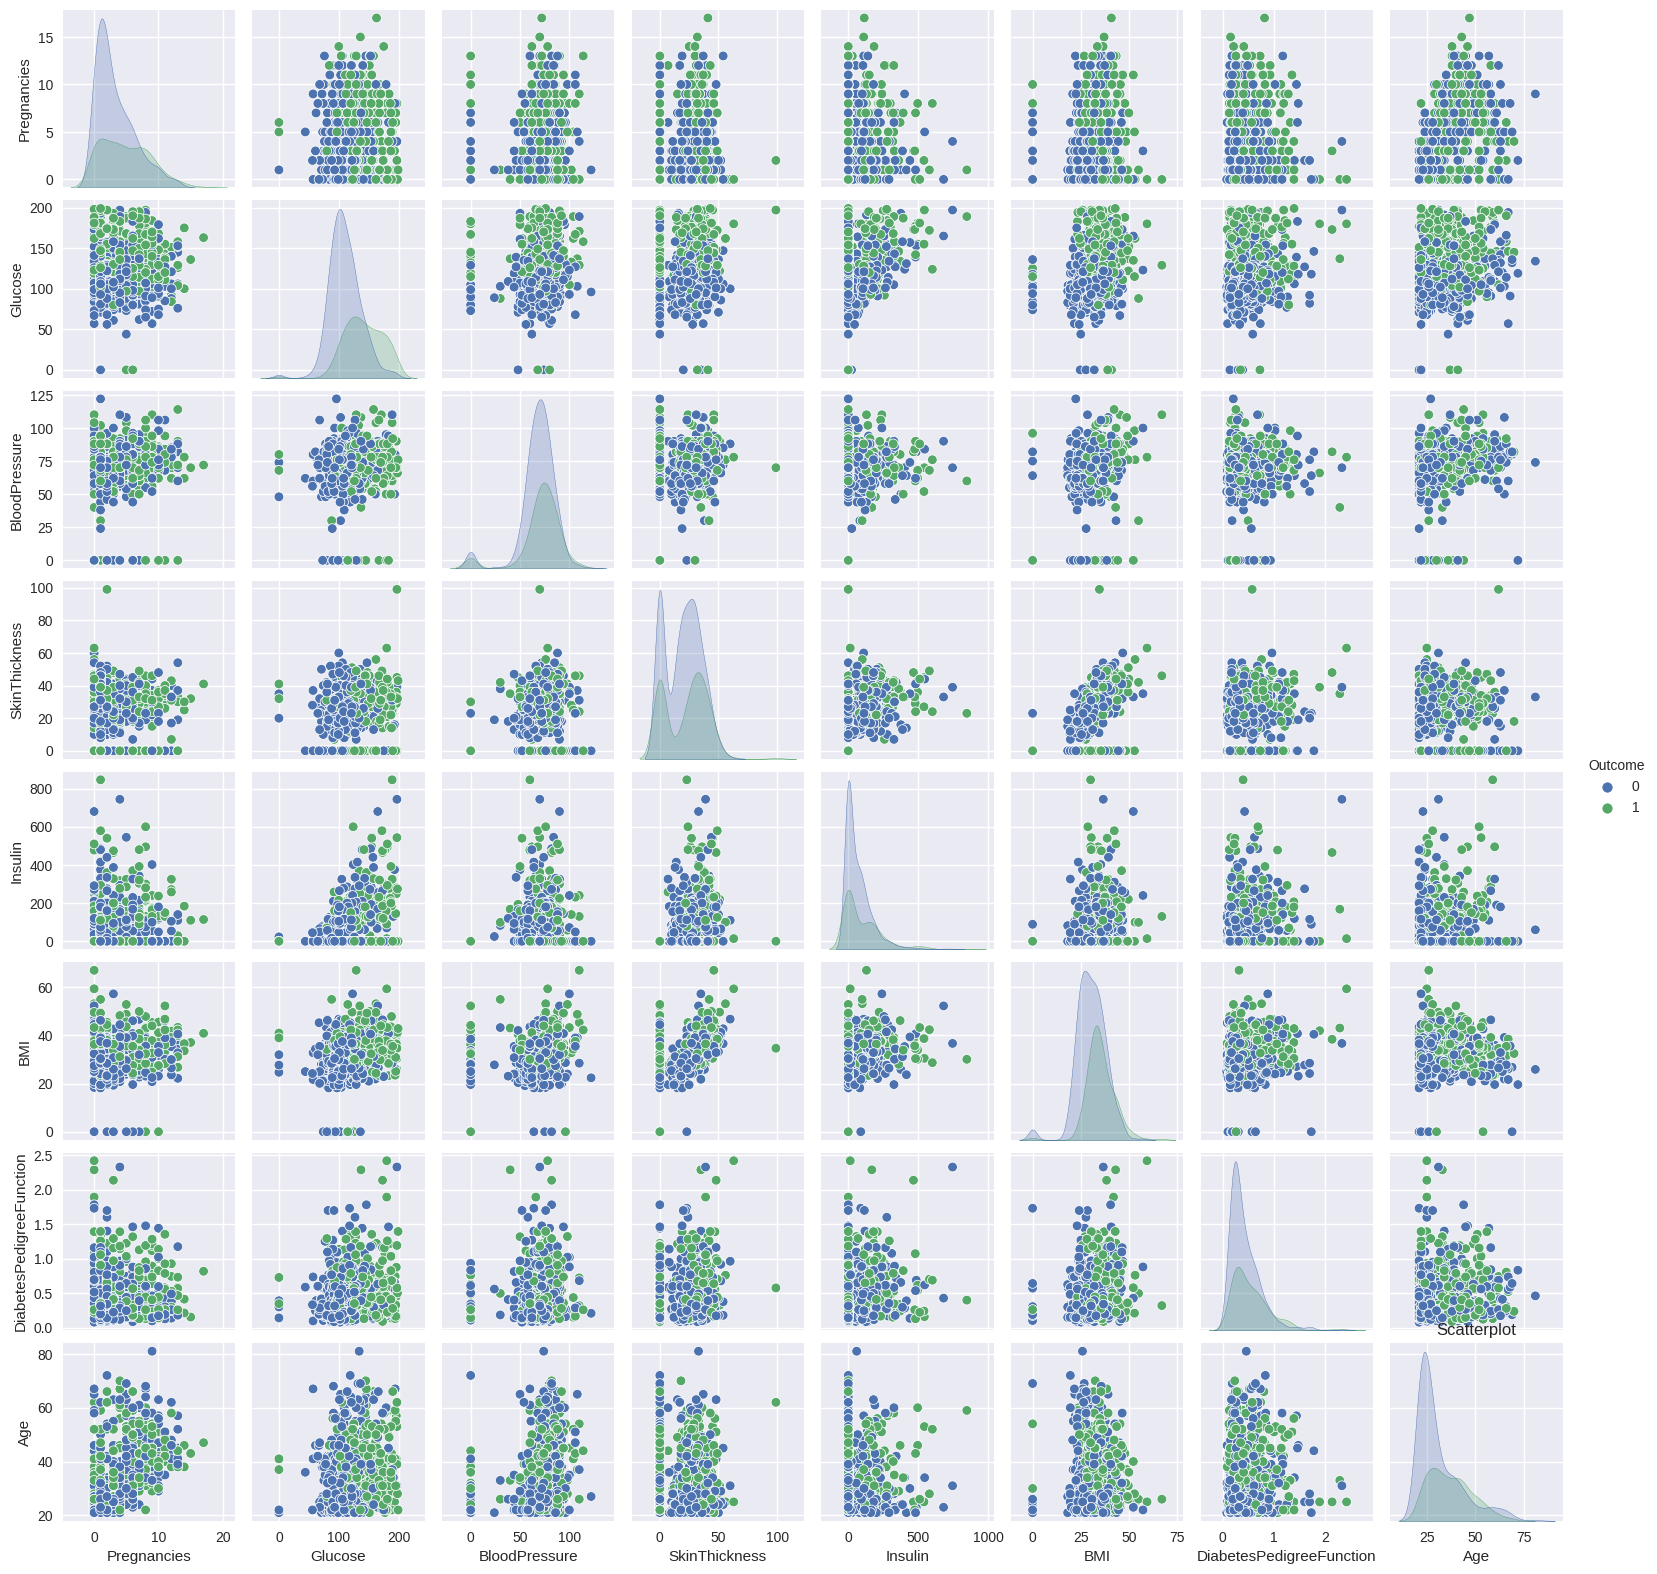

<Figure size 800x550 with 0 Axes>

In [18]:
sns.pairplot(data=df_diabetes, size=2, kind='scatter', hue='Outcome')

# Menambahkan judul
plt.title('Scatterplot')

# Menampilkan plot
plt.show()

plt.savefig('/content/drive/MyDrive/INDONESIA AI/Correlation_before', dpi=300)

# Check Skewness

In [19]:
skewness_columns = df_diabetes.skew()

skewness_columns = pd.DataFrame(
    {
        'Column name': skewness_columns.index,
        'Skewness value': skewness_columns.values
    }
)

skewness_columns['Skewness type'] = skewness_columns['Skewness value'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Symmetric'))

skewness_columns

,Column name,Skewness value,Skewness type
0,Pregnancies,0.901674,Positive
1,Glucose,0.173754,Positive
2,BloodPressure,-1.843608,Negative
3,SkinThickness,0.109372,Positive
4,Insulin,2.272251,Positive
5,BMI,-0.428982,Negative
6,DiabetesPedigreeFunction,1.919911,Positive
7,Age,1.129597,Positive
8,Outcome,0.635017,Positive


## Visualizations Skewness Each Column

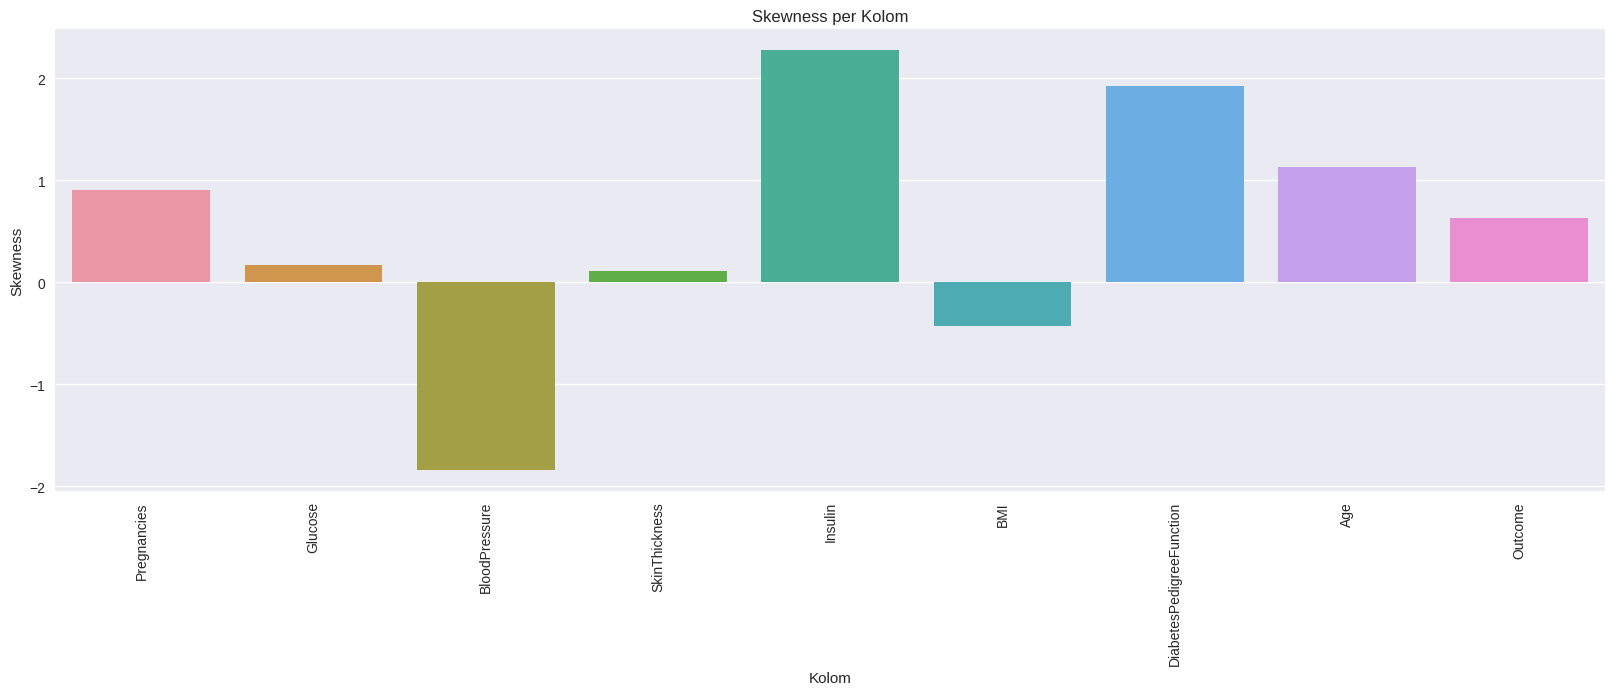

In [20]:
plt.figure(figsize=(20, 6))

sns.barplot(x=skewness_columns['Column name'], y=skewness_columns['Skewness value'])

plt.xticks(rotation=90)

plt.xlabel('Kolom')

plt.ylabel('Skewness')

plt.title('Skewness per Kolom')

plt.show()

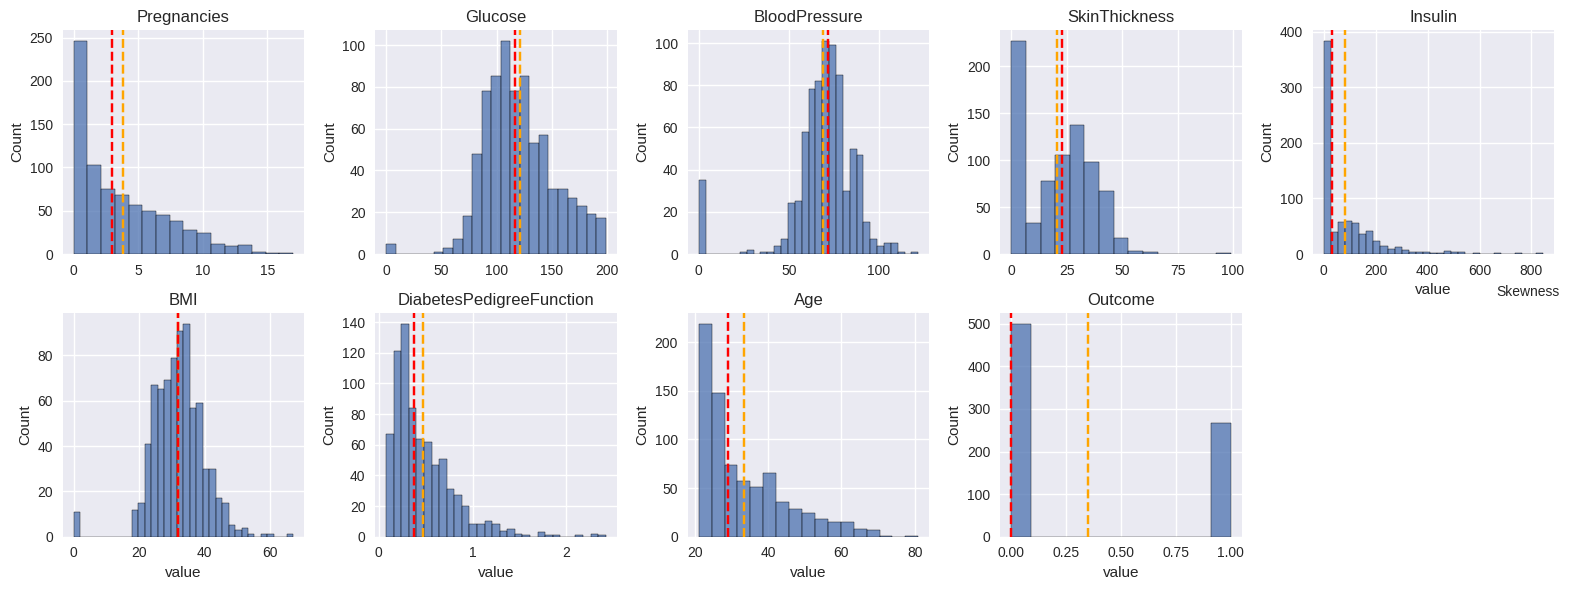

In [21]:
show_the_graphic(df_diabetes, sns.histplot, 'Skewness', 5)

# Check Outlier

In [22]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mendeteksi outlier
    outliers = df_diabetes[(column < lower_bound) | (column > upper_bound)]

    return outliers, lower_bound, upper_bound

In [23]:
def iteration_each_column():
    outliers_info = []

    for column in df_diabetes.columns:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df_diabetes[column])

        outliers_info.append([column, outliers[column].sum(), lower_bound, upper_bound])

    outliers_info = pd.DataFrame(outliers_info, columns=['Column name', 'Total outliers', 'Lower bound', 'Upper bound'])

    return outliers_info

In [24]:
outliers_info = iteration_each_column()

outliers_info

,Column name,Total outliers,Lower bound,Upper bound
0,Pregnancies,60.000,-6.500,13.500
1,Glucose,0.000,37.125,202.125
2,BloodPressure,866.000,35.000,107.000
3,SkinThickness,99.000,-48.000,80.000
4,Insulin,15537.000,-190.875,318.125
5,BMI,449.500,13.350,50.550
6,DiabetesPedigreeFunction,44.755,-0.330,1.200
7,Age,630.000,-1.500,66.500
8,Outcome,0.000,-1.500,2.500


## Visualizations Outlier Each Column

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


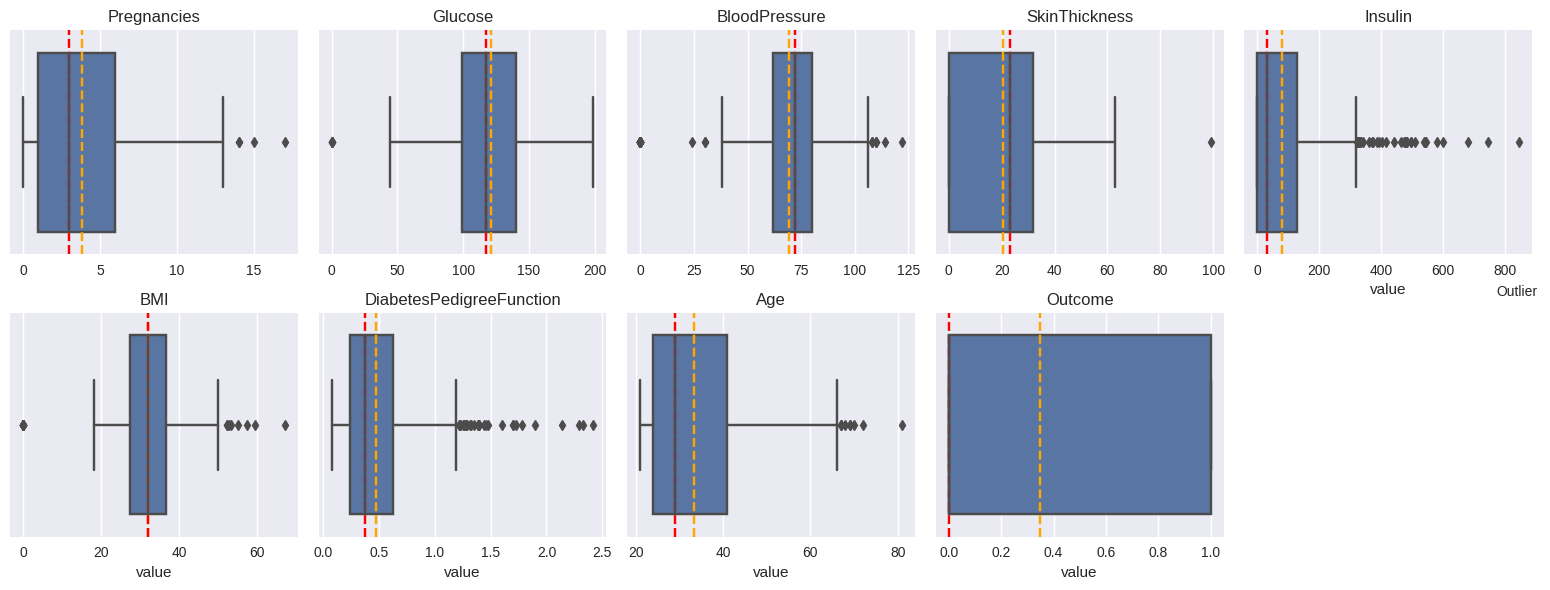

In [25]:
show_the_graphic(df_diabetes, sns.boxplot, 'Outlier', 5)


# Data Cleaning

## Handling Zero Value

From the Check Data Info and Check Total Zero Value in Each Column sections, it was previously known that only the Pregnancies column can be expected to have a value of 0 so that for the other columns the value of 0 will be replaced with NaN because it is possible that the model will become biased.

In [26]:
skewness_columns

,Column name,Skewness value,Skewness type
0,Pregnancies,0.901674,Positive
1,Glucose,0.173754,Positive
2,BloodPressure,-1.843608,Negative
3,SkinThickness,0.109372,Positive
4,Insulin,2.272251,Positive
5,BMI,-0.428982,Negative
6,DiabetesPedigreeFunction,1.919911,Positive
7,Age,1.129597,Positive
8,Outcome,0.635017,Positive


In [27]:
columns_zero_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for column in columns_zero_value:
  df_diabetes[column] = df_diabetes[column].replace(0, np.nan)

In [28]:
detect_null_values(df_diabetes)

,Column name,Total nulls,Total nulls (%),Data type
0,Glucose,5,0.651042,float64
1,BloodPressure,35,4.557292,float64
2,SkinThickness,227,29.557292,float64
3,Insulin,374,48.697917,float64
4,BMI,11,1.432292,float64


After the value 0 is changed to NaN, it means that there is a missing value, so the Glucose, BMI, Blood Pressure, Skin Thickness and Insulin columns will be calculated with the median value because these columns are not normally distributed when viewed from the Skewness Check. section and there are outliers. The median value is not sensitive to outliers

The mean value can be used if the column graph is normally distributed and there are no outliers

In [29]:
df_diabetes['Glucose'] = df_diabetes['Glucose'].fillna(df_diabetes['Glucose'].median())
df_diabetes['BMI'] = df_diabetes['BMI'].fillna(df_diabetes['BMI'].median())
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].fillna(df_diabetes['BloodPressure'].median())

df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].fillna(df_diabetes['SkinThickness'].median())
df_diabetes['Insulin'] = df_diabetes['Insulin'].fillna(df_diabetes['Insulin'].median())

In [30]:
detect_null_values(df_diabetes)

,Column name,Total nulls,Total nulls (%),Data type


## Handling Outlier

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


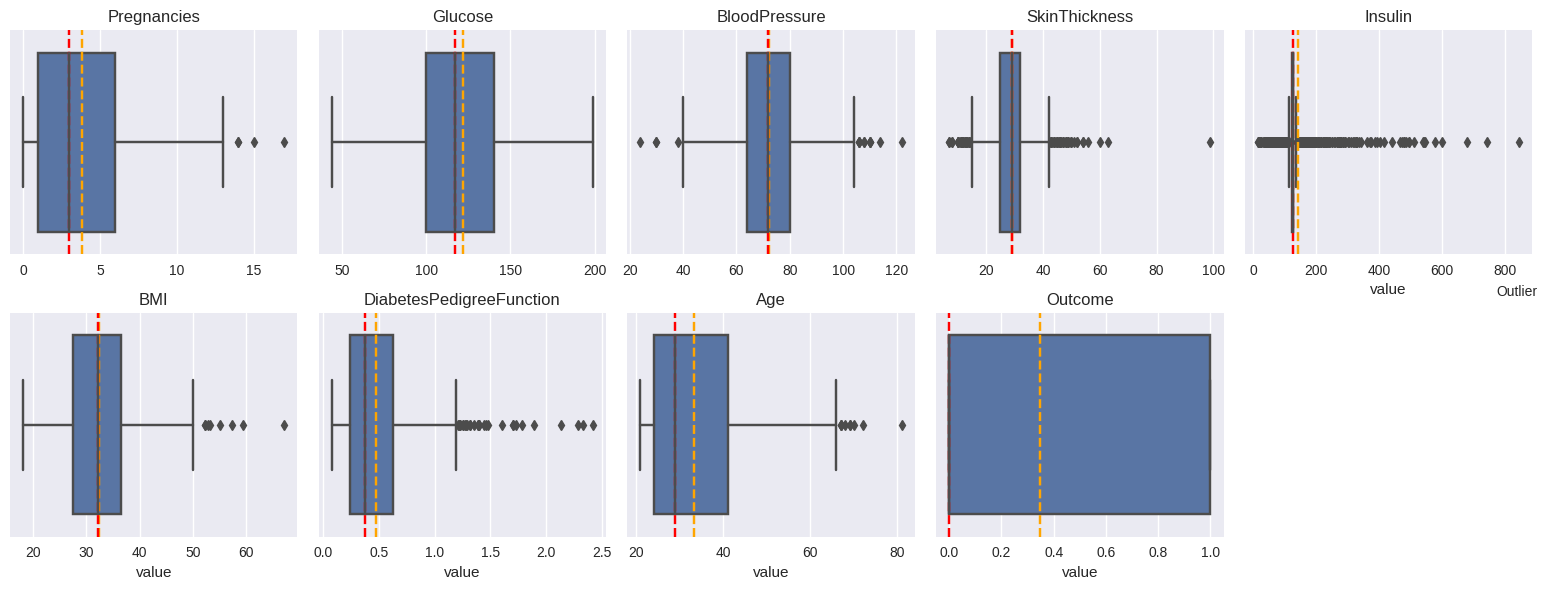

In [31]:
show_the_graphic(df_diabetes, sns.boxplot, 'Outlier', 5)

In [32]:
outliers_info = iteration_each_column()

outliers_info

,Column name,Total outliers,Lower bound,Upper bound
0,Pregnancies,60.000,-6.500,13.500
1,Glucose,0.000,39.000,201.000
2,BloodPressure,1222.000,40.000,104.000
3,SkinThickness,2791.000,14.500,42.500
4,Insulin,55307.000,112.875,135.875
5,BMI,449.500,13.850,50.250
6,DiabetesPedigreeFunction,44.755,-0.330,1.200
7,Age,630.000,-1.500,66.500
8,Outcome,0.000,-1.500,2.500


Computes the median value for columns that have outlier values

In [33]:
# df_diabetes_copy = df_diabetes.copy()

for column in outliers_info['Column name']:

    # Another way
    # df.loc[df['Column name'] == column_name, 'Total outliers'].values[0]
    if outliers_info[outliers_info['Column name'] == column]['Total outliers'].values[0] != 0:

      # Retrieves the lower bound and upper bound values for column 'column' from the result_numeric_columns table
      lower_bound = outliers_info[outliers_info['Column name'] == column]['Lower bound'].values[0]
      upper_bound = outliers_info[outliers_info['Column name'] == column]['Upper bound'].values[0]

      # Retrieving median value from column 'column'
      median = df_diabetes[column].median()

      df_diabetes.loc[(df_diabetes[column] < lower_bound) | (df_diabetes[column] > upper_bound), column] = median


In [34]:
outliers_info = iteration_each_column()

outliers_info

,Column name,Total outliers,Lower bound,Upper bound
0,Pregnancies,0.000,-6.500,13.50
1,Glucose,0.000,39.000,201.00
2,BloodPressure,0.000,40.000,104.00
3,SkinThickness,6374.000,22.500,34.50
4,Insulin,5479.000,125.000,125.00
5,BMI,149.300,14.300,49.50
6,DiabetesPedigreeFunction,17.162,-0.264,1.09
7,Age,459.000,0.000,64.00
8,Outcome,0.000,-1.500,2.50


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


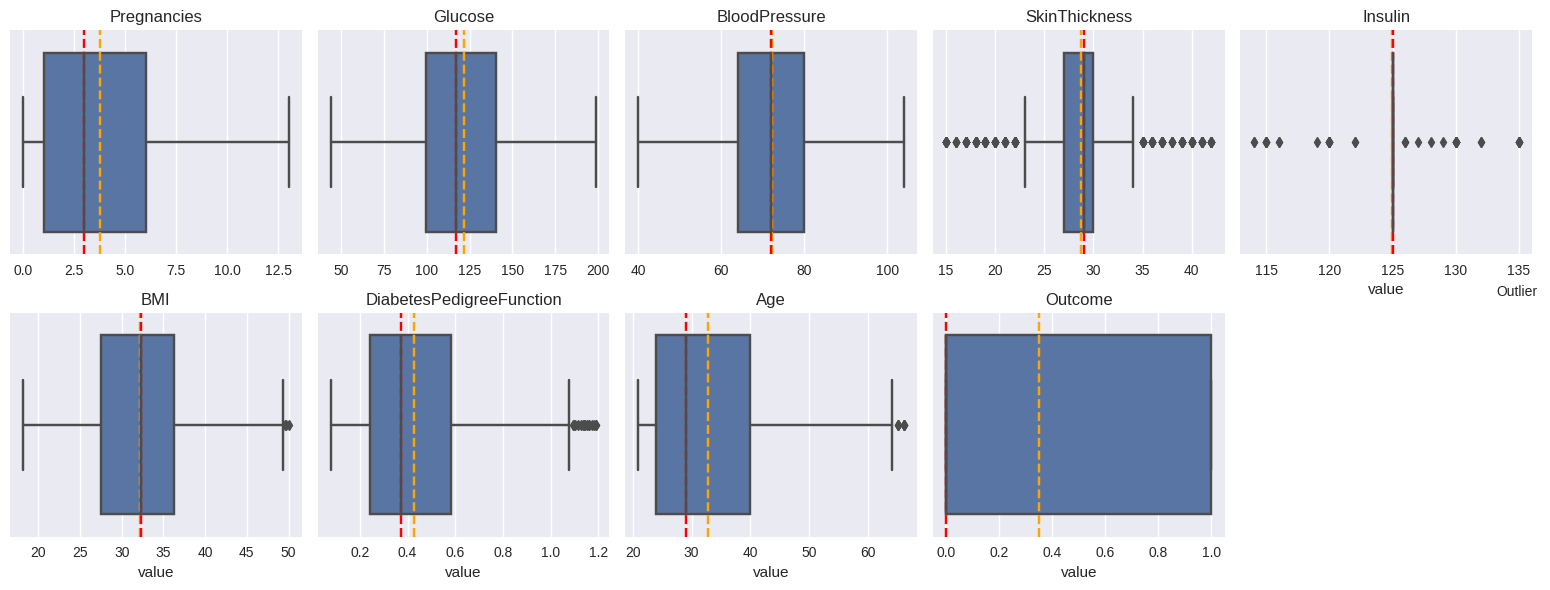

In [35]:
show_the_graphic(df_diabetes, sns.boxplot, 'Outlier', 5)

## Drop columns

Delete columns that have a relationship < 0.15 with the Outcome column

In [36]:
columns_corr

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [37]:
df_diabetes.drop('Insulin', axis=1, inplace=True)

In [38]:
# BloodPressure, SkinThickness, DiabetesPedigreeFunctio

In [39]:
df_diabetes.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

In [40]:
# df_diabetes.drop('DiabetesPedigreeFunction', axis=1, inplace=True)

In [41]:
df_diabetes

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,33.6,0.6270,50,1
1,1,85.0,26.6,0.3510,31,0
2,8,183.0,23.3,0.6720,32,1
3,1,89.0,28.1,0.1670,21,0
4,0,137.0,43.1,0.3725,33,1
...,...,...,...,...,...,...
763,10,101.0,32.9,0.1710,63,0
764,2,122.0,36.8,0.3400,27,0
765,5,121.0,26.2,0.2450,30,0
766,1,126.0,30.1,0.3490,47,1


In [42]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Handling Imbalanced Data

In [43]:
df_copy = df_diabetes

In [44]:
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [45]:
X = df_copy.drop('Outcome', axis=1)
y = df_copy.pop('Outcome')

y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [100]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Number of minority class samples before oversampling:", sum(y == 1))
print("Number of minority class samples after oversampling:", sum(y_resampled == 1))


Number of minority class samples before oversampling: 268
Number of minority class samples after oversampling: 500


# Split test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Standard scaler

Standardize existing value scale ranges

In [48]:
scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)  # Menghitung dan menerapkan transformasi pada data pelatihan
# X_test_scaled = scaler.transform(X_test)        # Menggunakan parameter yang sama pada data uji

# scaler.fit(X_train)  # Menghitung parameter transformasi dari data pelatihan
# X_train_scaled = scaler.transform(X_train)  # Menggunakan parameter pada data pelatihan
# X_test_scaled = scaler.transform(X_test)    # Menggunakan parameter yang sama pada data uji



X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Model


## Optimizer Adam

### Activation Function RELU

In [49]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from keras import regularizers

In [50]:
# Define the neural network architecture
def create_model(learning_rate, num_hidden_layers, num_neurons, dropout_value, epochs, batch_size):

    # activation_functions = ['relu', 'tanh', 'sigmoid', 'softmax']

    model = Sequential()

    for i in range(num_hidden_layers):
        # model.add(Dense(num_neurons, activation='relu', kernel_regularizer=regularizers.l2(1.0)))
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(dropout_value))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model, epochs, batch_size

In [51]:
# Define the objective function to optimize
def objective(learning_rate, num_hidden_layers, num_neurons, dropout_value, epochs, batch_size):

    model, _epochs, _batch_size = create_model(learning_rate, int(num_hidden_layers), int(num_neurons), dropout_value, int(epochs), int(batch_size))

    model.fit(X_train, y_train, epochs=_epochs, batch_size=_batch_size, validation_data=(X_test, y_test), verbose=0)

    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

    return val_acc

In [52]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.0001, 0.1),
           'num_hidden_layers': (1, 5),
           'num_neurons': (5, 50),
           'dropout_value': (0.1, 0.6),
           'epochs': (5, 60),
           'batch_size': (10, 128)}

In [53]:
# Perform Bayesian optimization
# Parameter harus numerik tidak bisa string
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=30)

|   iter    |  target   | batch_... | dropou... |  epochs   | learni... | num_hi... | num_ne... |
-------------------------------------------------------------------------------------------------
| 1         | 0.64      | 44.97     | 0.1353    | 40.68     | 0.08726   | 4.746     | 35.3      |
| 2         | 0.78      | 124.8     | 0.2342    | 40.23     | 0.03136   | 4.323     | 40.79     |
| 3         | 0.72      | 97.56     | 0.4249    | 54.7      | 0.06115   | 2.229     | 14.14     |
| 4         | 0.52      | 12.9      | 0.5648    | 6.338     | 0.05159   | 3.459     | 16.2      |
| 5         | 0.76      | 117.7     | 0.2011    | 14.66     | 0.0329    | 3.912     | 7.704     |
| 6         | 0.54      | 128.0     | 0.6       | 5.0       | 0.0001    | 1.0       | 50.0      |
| 7         | 0.72      | 123.5     | 0.4075    | 40.54     | 0.04937   | 4.482     | 41.25     |
| 8         | 0.8       | 127.6     | 0.1835    | 40.72     | 0.01523   | 3.948     | 39.26     |
| 9         | 0.48  

In [54]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'batch_size': 127.61611819009015, 'dropout_value': 0.18347895465704497, 'epochs': 40.72277583741811, 'learning_rate': 0.015227318618454075, 'num_hidden_layers': 3.9482315499136025, 'num_neurons': 39.26114468158238}
Validation accuracy: 80.00%


In [55]:
# PERCOBAAN 1
  # {'batch_size': 24.331032849670102, 'dropout_value': 0.1826251048602797, 'epochs': 31.179143807357608, 'learning_rate': 0.005561885986049492, 'num_hidden_layers': 4.329141035454036, 'num_neurons': 38.889981165551134}
  # Validation accuracy: 80.00%

In [56]:
print(optimizer.max['params'])

{'batch_size': 127.61611819009015, 'dropout_value': 0.18347895465704497, 'epochs': 40.72277583741811, 'learning_rate': 0.015227318618454075, 'num_hidden_layers': 3.9482315499136025, 'num_neurons': 39.26114468158238}


In [57]:
best_parameter = optimizer.max['params']

_hidden_layers = int(best_parameter['num_hidden_layers'])
_neurons = int(best_parameter['num_neurons'])
_epochs = int(best_parameter['epochs'])
_batch_size = int(best_parameter['batch_size'])
_learning_rate = best_parameter['learning_rate']
_dropout = best_parameter['dropout_value']

In [58]:
model, _, _ = create_model(_learning_rate, _hidden_layers, _neurons, _dropout, _epochs, _batch_size)
# model, _, _ = create_model(0.007, 3, 30, 0.5, 28, 96)

In [59]:
history = model.fit(X_train, y_train, epochs=_epochs, validation_data=(X_test, y_test), batch_size=_batch_size)
# history = model.fit(X_train, y_train, epochs=28, validation_data=(X_test, y_test), batch_size=96)

Epoch 1/40
8/8 [==============================] - 1s 27ms/step - loss: 0.6041 - accuracy: 0.6633 - val_loss: 0.5507 - val_accuracy: 0.7200
Epoch 2/40
8/8 [==============================] - 0s 7ms/step - loss: 0.5047 - accuracy: 0.7511 - val_loss: 0.5275 - val_accuracy: 0.7600
Epoch 3/40
8/8 [==============================] - 0s 9ms/step - loss: 0.4849 - accuracy: 0.7733 - val_loss: 0.5330 - val_accuracy: 0.7600
Epoch 4/40
8/8 [==============================] - 0s 8ms/step - loss: 0.4772 - accuracy: 0.7633 - val_loss: 0.5519 - val_accuracy: 0.7400
Epoch 5/40
8/8 [==============================] - 0s 9ms/step - loss: 0.4741 - accuracy: 0.7667 - val_loss: 0.5250 - val_accuracy: 0.7200
Epoch 6/40
8/8 [==============================] - 0s 6ms/step - loss: 0.4607 - accuracy: 0.7844 - val_loss: 0.5237 - val_accuracy: 0.7600
Epoch 7/40
8/8 [==============================] - 0s 7ms/step - loss: 0.4545 - accuracy: 0.7889 - val_loss: 0.5268 - val_accuracy: 0.7700
Epoch 8/40
8/8 [=================

In [60]:
# PERCOBAAN 1
  # loss: 0.4330 - accuracy: 0.8112 - val_loss: 0.5027 - val_accuracy: 0.7950

In [61]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

val_loss, val_acc

(0.535372257232666, 0.75)

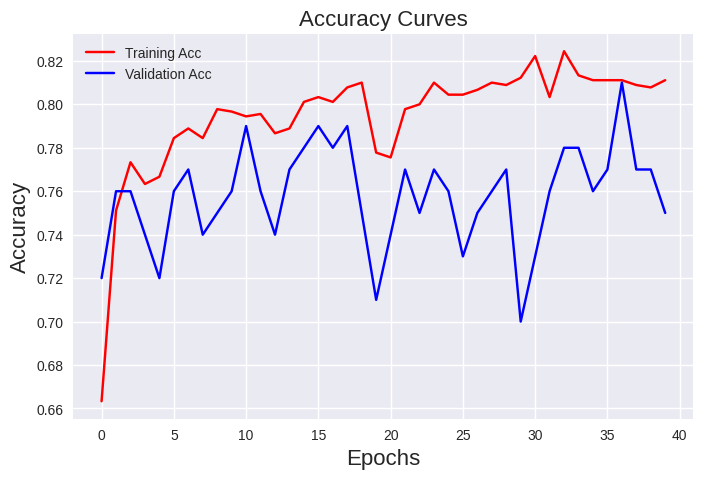

<Figure size 800x550 with 0 Axes>

In [62]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

# plt.savefig('/content/drive/MyDrive/INDONESIA AI/Accuracy curves.png')
plt.savefig('/content/drive/MyDrive/INDONESIA AI/Accuracy curves', dpi=300, transparent=False)

# import shutil
# shutil.move("Accuracy_curves.png", "/content/drive/MyDrive/INDONESIA AI/")  # Pindahkan ke direktori yang dapat diakses


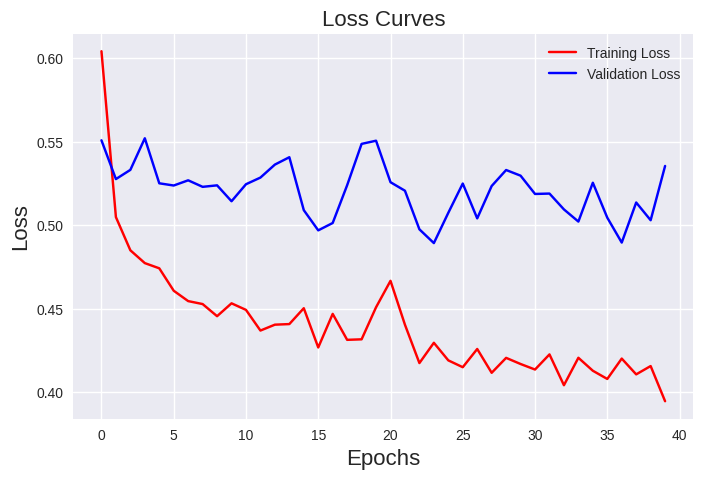

In [63]:
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

#### Evaluation

In [64]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# y_pred

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.73      0.75        52
           1       0.73      0.77      0.75        48

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



<Axes: >

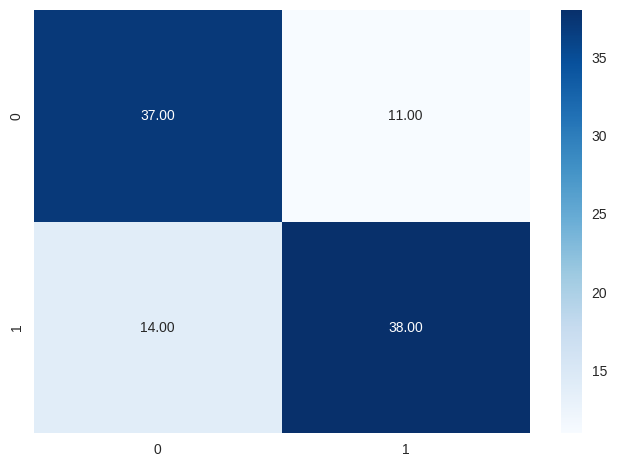

In [65]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

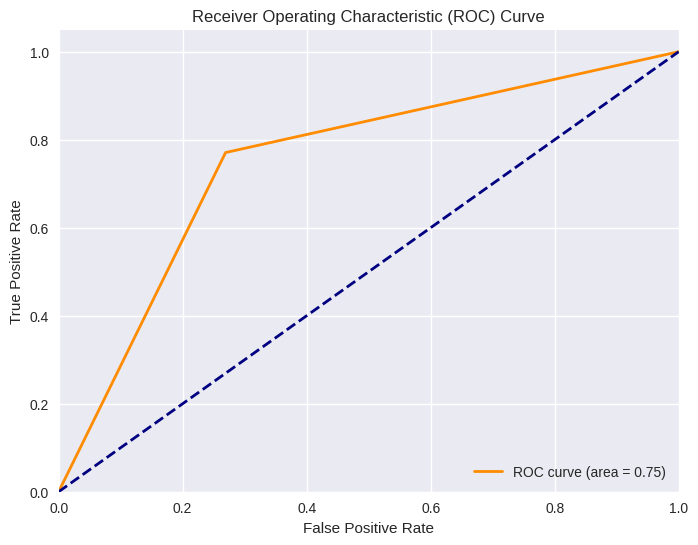

In [66]:
# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Gambar grafik ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Activation Function TANH

In [67]:
# Define the neural network architecture
def create_model(learning_rate, num_hidden_layers, num_neurons, dropout_value, epochs, batch_size):

    # activation_functions = ['relu', 'tanh', 'sigmoid', 'softmax']

    model = Sequential()

    for i in range(num_hidden_layers):
        # model.add(Dense(num_neurons, activation='relu', kernel_regularizer=regularizers.l2(1.0)))
        model.add(Dense(num_neurons, activation='tanh'))
        model.add(Dropout(dropout_value))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model, epochs, batch_size

In [68]:
# Define the objective function to optimize
def objective(learning_rate, num_hidden_layers, num_neurons, dropout_value, epochs, batch_size):

    model, _epochs, _batch_size = create_model(learning_rate, int(num_hidden_layers), int(num_neurons), dropout_value, int(epochs), int(batch_size))

    model.fit(X_train, y_train, epochs=_epochs, batch_size=_batch_size, validation_data=(X_test, y_test), verbose=0)

    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

    return val_acc

In [69]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.0001, 0.1),
           'num_hidden_layers': (1, 5),
           'num_neurons': (5, 50),
           'dropout_value': (0.1, 0.6),
           'epochs': (5, 60),
           'batch_size': (10, 128)}

In [70]:
# Perform Bayesian optimization
# Parameter harus numerik tidak bisa string
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=30)

|   iter    |  target   | batch_... | dropou... |  epochs   | learni... | num_hi... | num_ne... |
-------------------------------------------------------------------------------------------------
| 1         | 0.73      | 121.7     | 0.5964    | 56.19     | 0.05084   | 4.029     | 41.34     |
| 2         | 0.73      | 95.53     | 0.3098    | 30.07     | 0.02131   | 1.221     | 6.86      |
| 3         | 0.72      | 50.97     | 0.2856    | 13.17     | 0.06054   | 2.851     | 47.97     |
| 4         | 0.7       | 71.14     | 0.5945    | 46.42     | 0.02546   | 4.213     | 10.01     |
| 5         | 0.69      | 21.34     | 0.1128    | 53.67     | 0.08737   | 4.42      | 28.77     |
| 6         | 0.72      | 121.0     | 0.1466    | 55.18     | 0.04023   | 4.955     | 40.26     |
| 7         | 0.75      | 125.2     | 0.3398    | 57.91     | 0.06102   | 3.536     | 43.48     |
| 8         | 0.72      | 127.2     | 0.5029    | 52.82     | 0.02835   | 3.183     | 47.98     |
| 9         | 0.75  

In [71]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'batch_size': 127.9813778225147, 'dropout_value': 0.1406333357119667, 'epochs': 59.96388482484703, 'learning_rate': 0.01246204719849174, 'num_hidden_layers': 2.668229968720156, 'num_neurons': 46.58075009128332}
Validation accuracy: 80.00%


In [72]:
# PERCOBAAN 1
  # {'batch_size': 110.46143109539632, 'dropout_value': 0.49035311462617803, 'epochs': 56.65415526291134, 'learning_rate': 0.036236554058306926, 'num_hidden_layers': 4.364711332221509, 'num_neurons': 47.627350845771375}
  # Validation accuracy: 79.00%

  # {'batch_size': 64.13690022189073, 'dropout_value': 0.4626169056815148, 'epochs': 44.299916450454, 'learning_rate': 0.06908353267082638, 'num_hidden_layers': 1.2040066009614572, 'num_neurons': 26.290301406791823}
  # Validation accuracy: 79.00% -> Soalnya TP 39 dan TN 35

In [73]:
print(optimizer.max['params'])

{'batch_size': 127.9813778225147, 'dropout_value': 0.1406333357119667, 'epochs': 59.96388482484703, 'learning_rate': 0.01246204719849174, 'num_hidden_layers': 2.668229968720156, 'num_neurons': 46.58075009128332}


In [74]:
best_parameter = optimizer.max['params']

_hidden_layers = int(best_parameter['num_hidden_layers'])
_neurons = int(best_parameter['num_neurons'])
_epochs = int(best_parameter['epochs'])
_batch_size = int(best_parameter['batch_size'])
_learning_rate = best_parameter['learning_rate']
_dropout = best_parameter['dropout_value']

In [75]:
model, _, _ = create_model(_learning_rate, _hidden_layers, _neurons, _dropout, _epochs, _batch_size)
# model, _, _ = create_model(0.007, 3, 30, 0.5, 28, 96)

In [76]:
history = model.fit(X_train, y_train, epochs=_epochs, validation_data=(X_test, y_test), batch_size=_batch_size)
# history = model.fit(X_train, y_train, epochs=28, validation_data=(X_test, y_test), batch_size=96)

Epoch 1/59
8/8 [==============================] - 1s 33ms/step - loss: 0.5484 - accuracy: 0.6989 - val_loss: 0.5944 - val_accuracy: 0.7000
Epoch 2/59
8/8 [==============================] - 0s 10ms/step - loss: 0.5353 - accuracy: 0.7311 - val_loss: 0.5477 - val_accuracy: 0.7200
Epoch 3/59
8/8 [==============================] - 0s 11ms/step - loss: 0.5187 - accuracy: 0.7289 - val_loss: 0.5486 - val_accuracy: 0.7200
Epoch 4/59
8/8 [==============================] - 0s 12ms/step - loss: 0.5082 - accuracy: 0.7367 - val_loss: 0.5591 - val_accuracy: 0.6900
Epoch 5/59
8/8 [==============================] - 0s 12ms/step - loss: 0.5200 - accuracy: 0.7300 - val_loss: 0.5478 - val_accuracy: 0.7100
Epoch 6/59
8/8 [==============================] - 0s 13ms/step - loss: 0.4970 - accuracy: 0.7489 - val_loss: 0.5551 - val_accuracy: 0.7200
Epoch 7/59
8/8 [==============================] - 0s 9ms/step - loss: 0.5016 - accuracy: 0.7356 - val_loss: 0.5497 - val_accuracy: 0.7200
Epoch 8/59
8/8 [============

In [77]:
# PERCOBAAN 1
  # loss: 0.5385 - accuracy: 0.7375 - val_loss: 0.5204 - val_accuracy: 0.7450
  # loss: 0.5030 - accuracy: 0.7544 - val_loss: 0.5373 - val_accuracy: 0.7400

In [78]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

val_loss, val_acc

(0.5297759771347046, 0.7699999809265137)

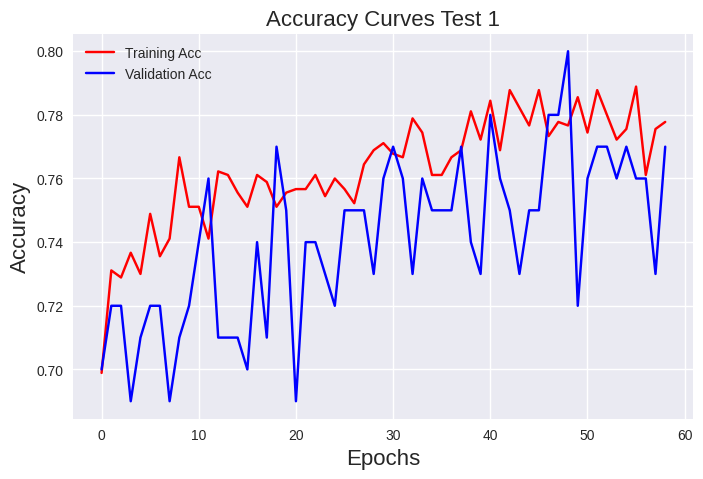

<Figure size 800x550 with 0 Axes>

In [79]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Test 1', fontsize=16)

plt.show()

# plt.savefig('/content/drive/MyDrive/INDONESIA AI/Accuracy curves.png')
plt.savefig('/content/drive/MyDrive/INDONESIA AI/Accuracy curves', dpi=300, transparent=False)

# import shutil
# shutil.move("Accuracy_curves.png", "/content/drive/MyDrive/INDONESIA AI/")  # Pindahkan ke direktori yang dapat diakses


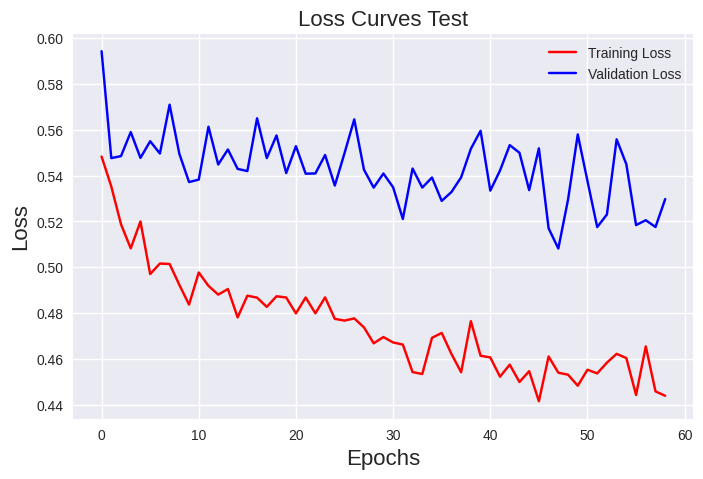

In [80]:
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves Test', fontsize=16)

plt.show()

#### Evaluation

In [81]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# y_pred

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        52
           1       0.76      0.77      0.76        48

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



<Axes: >

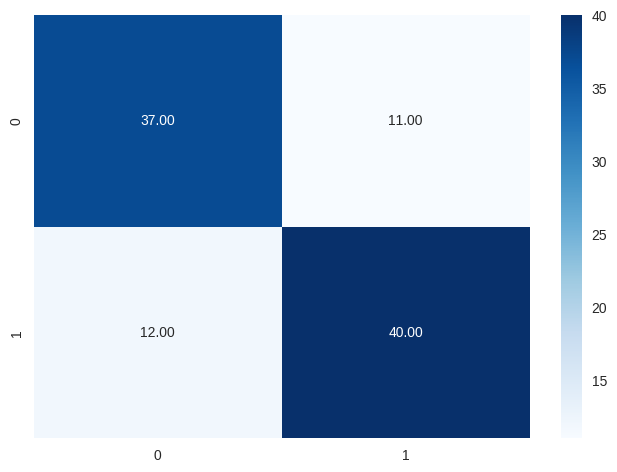

In [82]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

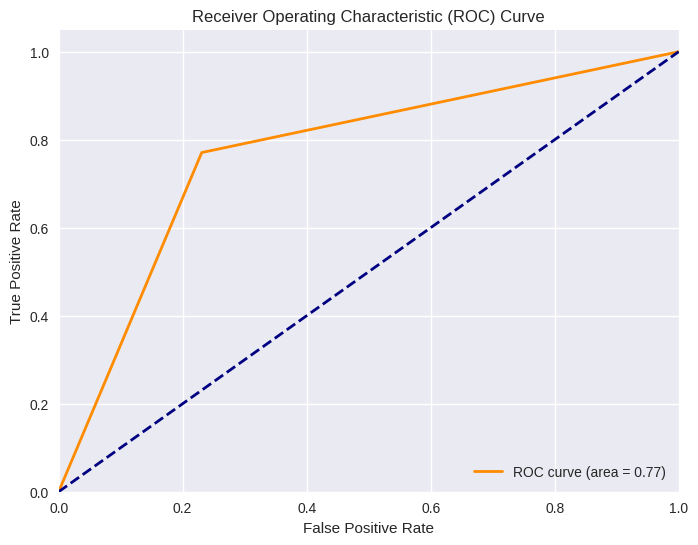

In [83]:
# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Gambar grafik ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Activation Function SOFTMAX

In [84]:
# Define the neural network architecture
def create_model(learning_rate, num_hidden_layers, num_neurons, dropout_value, epochs, batch_size):

    # activation_functions = ['relu', 'tanh', 'sigmoid', 'softmax']

    model = Sequential()

    for i in range(num_hidden_layers):
        # model.add(Dense(num_neurons, activation='relu', kernel_regularizer=regularizers.l2(1.0)))
        model.add(Dense(num_neurons, activation='softmax'))
        model.add(Dropout(dropout_value))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model, epochs, batch_size

In [85]:
# Define the objective function to optimize
def objective(learning_rate, num_hidden_layers, num_neurons, dropout_value, epochs, batch_size):

    model, _epochs, _batch_size = create_model(learning_rate, int(num_hidden_layers), int(num_neurons), dropout_value, int(epochs), int(batch_size))

    model.fit(X_train, y_train, epochs=_epochs, batch_size=_batch_size, validation_data=(X_test, y_test), verbose=0)

    val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

    return val_acc

In [86]:
# Define the search space for hyperparameters
pbounds = {'learning_rate': (0.0001, 0.1),
           'num_hidden_layers': (1, 5),
           'num_neurons': (5, 50),
           'dropout_value': (0.1, 0.6),
           'epochs': (5, 60),
           'batch_size': (10, 128)}

In [87]:
# Perform Bayesian optimization
# Parameter harus numerik tidak bisa string
optimizer = BayesianOptimization(f=objective, pbounds=pbounds, verbose=2)
optimizer.maximize(init_points=5, n_iter=30)

|   iter    |  target   | batch_... | dropou... |  epochs   | learni... | num_hi... | num_ne... |
-------------------------------------------------------------------------------------------------
| 1         | 0.78      | 102.5     | 0.3422    | 41.89     | 0.06098   | 1.614     | 30.25     |
| 2         | 0.74      | 29.72     | 0.5605    | 56.08     | 0.02958   | 1.503     | 33.67     |
| 3         | 0.8       | 105.0     | 0.2633    | 43.83     | 0.07931   | 3.797     | 48.94     |
| 4         | 0.75      | 58.27     | 0.1343    | 29.66     | 0.02735   | 1.618     | 26.75     |
| 5         | 0.76      | 16.49     | 0.125     | 9.801     | 0.02447   | 2.397     | 45.87     |
| 6         | 0.75      | 104.3     | 0.1965    | 44.99     | 0.04871   | 2.526     | 49.25     |
| 7         | 0.77      | 126.7     | 0.3764    | 46.88     | 0.06266   | 2.592     | 37.13     |
| 8         | 0.74      | 70.72     | 0.4856    | 16.75     | 0.06263   | 2.377     | 32.09     |
| 9         | 0.73  

In [88]:
# Print the optimized hyperparameters and validation accuracy
print('Optimized hyperparameters:')
print(optimizer.max['params'])
print('Validation accuracy: {:.2f}%'.format(optimizer.max['target'] * 100))

Optimized hyperparameters:
{'batch_size': 105.045881684777, 'dropout_value': 0.26328824340403756, 'epochs': 43.83433825090337, 'learning_rate': 0.07930768503526532, 'num_hidden_layers': 3.7968917190692895, 'num_neurons': 48.944826275608335}
Validation accuracy: 80.00%


In [89]:
print(optimizer.max['params'])

{'batch_size': 105.045881684777, 'dropout_value': 0.26328824340403756, 'epochs': 43.83433825090337, 'learning_rate': 0.07930768503526532, 'num_hidden_layers': 3.7968917190692895, 'num_neurons': 48.944826275608335}


In [90]:
best_parameter = optimizer.max['params']

_hidden_layers = int(best_parameter['num_hidden_layers'])
_neurons = int(best_parameter['num_neurons'])
_epochs = int(best_parameter['epochs'])
_batch_size = int(best_parameter['batch_size'])
_learning_rate = best_parameter['learning_rate']
_dropout = best_parameter['dropout_value']

In [91]:
model, _, _ = create_model(_learning_rate, _hidden_layers, _neurons, _dropout, _epochs, _batch_size)
# model, _, _ = create_model(0.007, 3, 30, 0.5, 28, 96)

In [92]:
history = model.fit(X_train, y_train, epochs=_epochs, validation_data=(X_test, y_test), batch_size=_batch_size)
# history = model.fit(X_train, y_train, epochs=28, validation_data=(X_test, y_test), batch_size=96)

Epoch 1/43
9/9 [==============================] - 1s 31ms/step - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 2/43
9/9 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5544 - val_loss: 0.6772 - val_accuracy: 0.6000
Epoch 3/43
9/9 [==============================] - 0s 7ms/step - loss: 0.6420 - accuracy: 0.7211 - val_loss: 0.5949 - val_accuracy: 0.7200
Epoch 4/43
9/9 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.7433 - val_loss: 0.5427 - val_accuracy: 0.7700
Epoch 5/43
9/9 [==============================] - 0s 6ms/step - loss: 0.5391 - accuracy: 0.7500 - val_loss: 0.5449 - val_accuracy: 0.7400
Epoch 6/43
9/9 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7633 - val_loss: 0.5509 - val_accuracy: 0.7400
Epoch 7/43
9/9 [==============================] - 0s 6ms/step - loss: 0.5246 - accuracy: 0.7622 - val_loss: 0.5680 - val_accuracy: 0.7000
Epoch 8/43
9/9 [=================

In [93]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=0)

val_loss, val_acc

(0.5519086718559265, 0.7300000190734863)

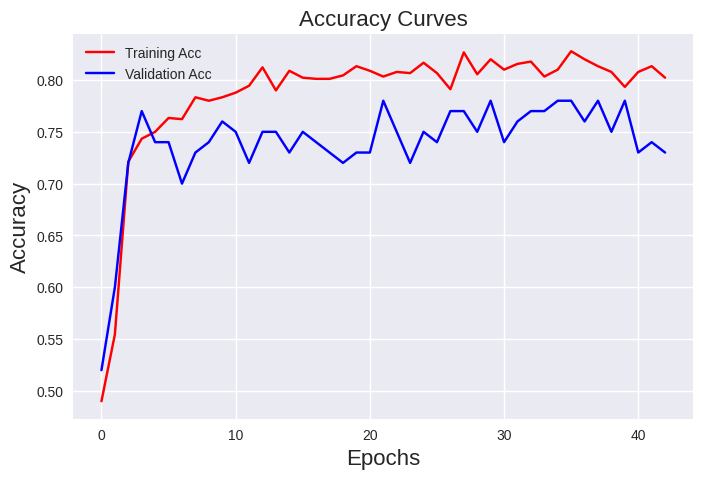

<Figure size 800x550 with 0 Axes>

In [94]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

# plt.savefig('/content/drive/MyDrive/INDONESIA AI/Accuracy curves.png')
plt.savefig('/content/drive/MyDrive/INDONESIA AI/Accuracy curves', dpi=300, transparent=False)

# import shutil
# shutil.move("Accuracy_curves.png", "/content/drive/MyDrive/INDONESIA AI/")  # Pindahkan ke direktori yang dapat diakses


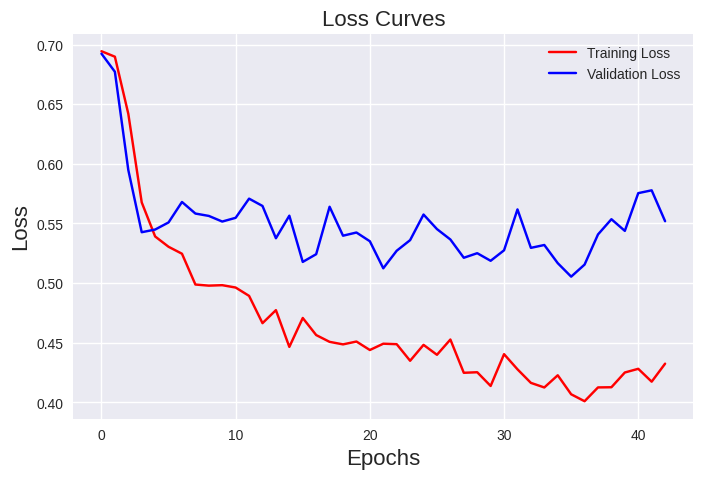

In [95]:
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

#### Evaluation

In [96]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# y_pred

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        52
           1       0.70      0.77      0.73        48

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



<Axes: >

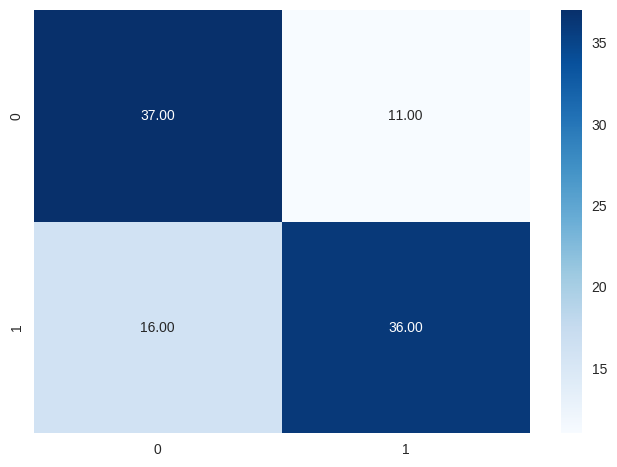

In [97]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap((cnf_matrix / np.sum(cnf_matrix)*100), annot=True, fmt=".2f", cmap="Blues")

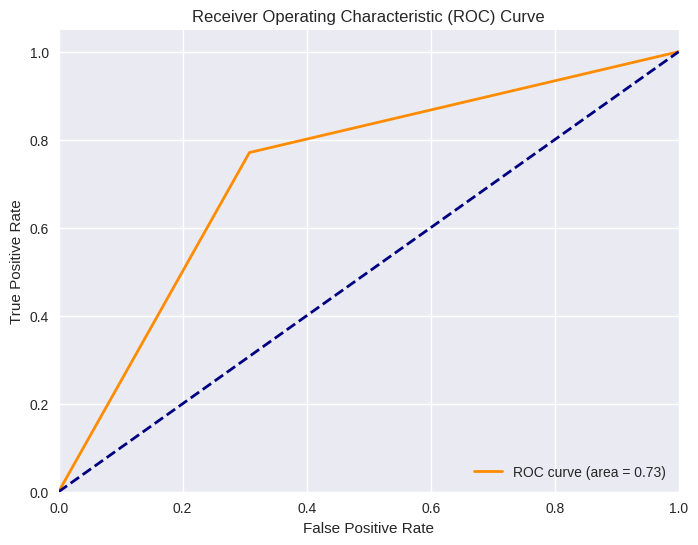

In [98]:
# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Gambar grafik ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()